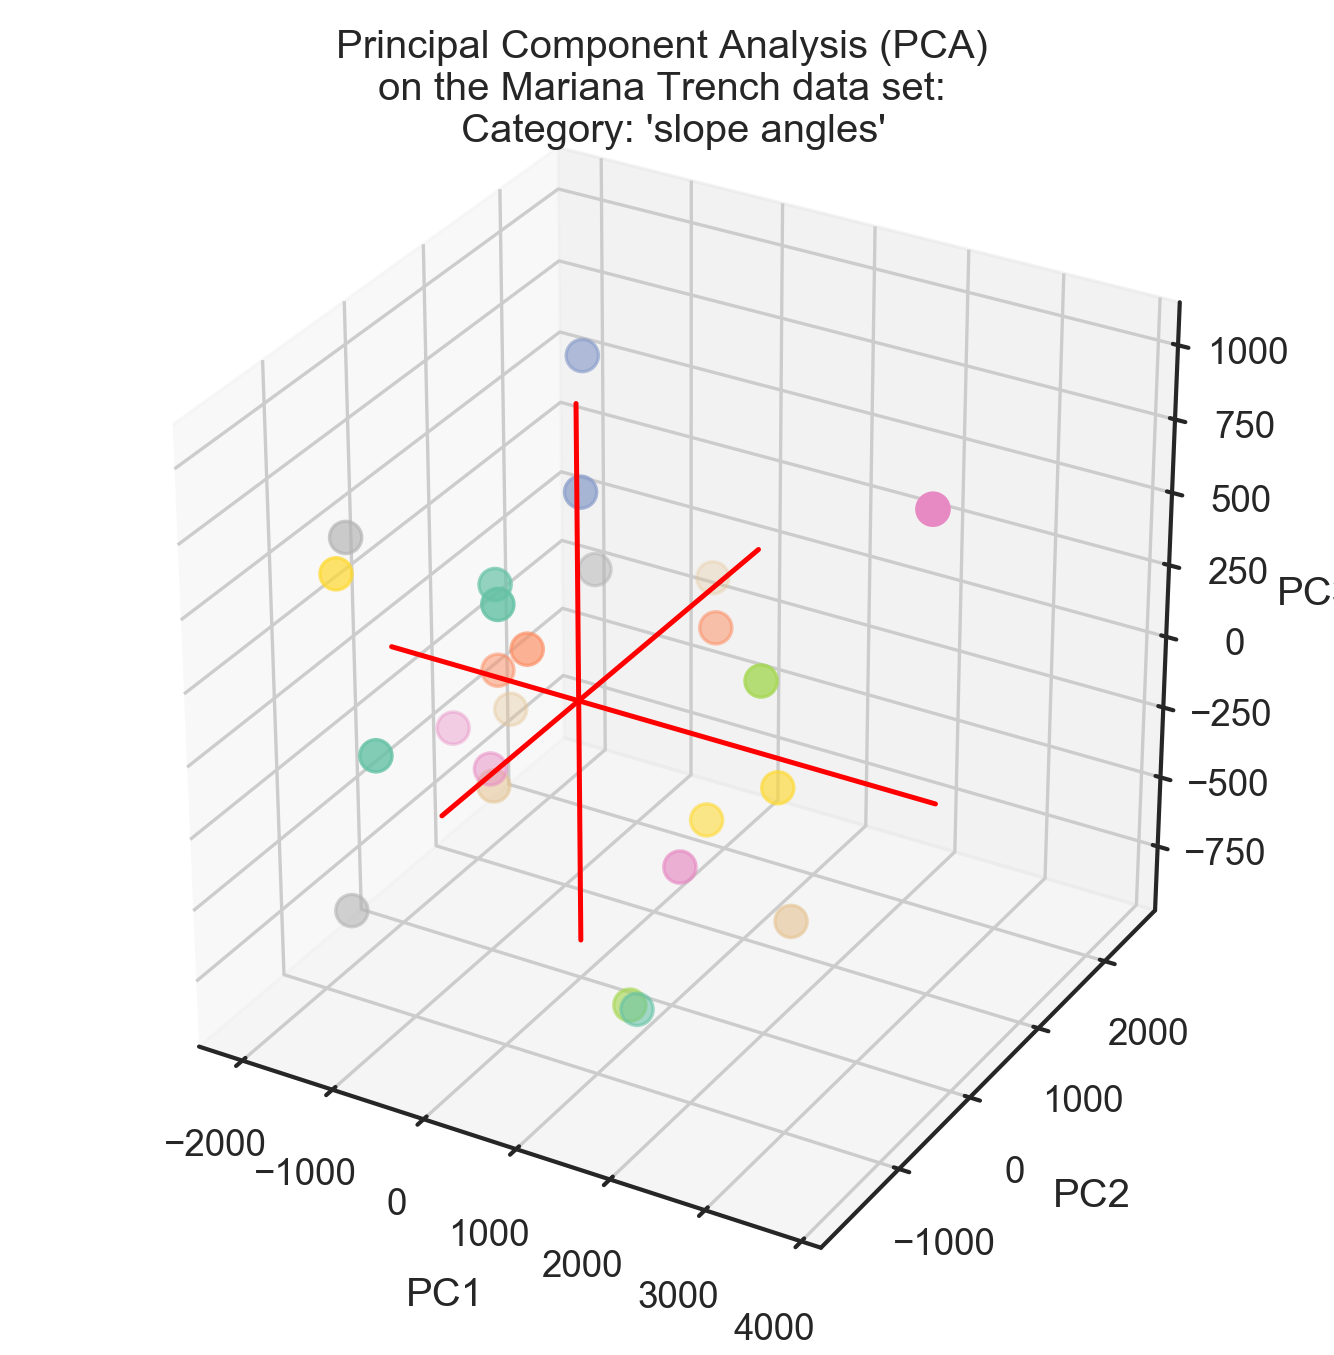

In [14]:
#!/usr/bin/env python
# coding: utf-8
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns

os.chdir('/Users/pauline/Documents/Python')
df = pd.read_csv("Tab-Morph.csv")

sns.set_style("white")
sns.set_context("paper")

# keep the 'slope_angle' column appart + make it numeric for coloring
df['slope_angle']=pd.Categorical(df['slope_angle'])
my_color=df['slope_angle'].cat.codes
df = df.drop('slope_angle', 1)

# run PCA
pca = PCA(n_components=3)
pca.fit(df)

# store results of the PCA in a data frame
result=pd.DataFrame(pca.transform(df),
                    columns=['PCA%i' % i for i in range(3)], index=df.index
                    )

# plotting
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'],
           c=my_color, cmap="Set2_r", s=60)
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0, 0))
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0, 0)
            )
zAxisLine = ((0, 0), (0, 0), (min(result['PCA2']), max(result['PCA2']))
            )
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Principal Component Analysis (PCA) \non the Mariana Trench data set: \n Category: 'slope angles'"
            )

fig.savefig('plot_PCA.png', dpi=300)
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08,
                    left=0.10, right=0.95,
                    hspace=0.25, wspace=0.35
                    )
plt.show()